# Homework 3

This homework will explore linear regression and resampling techniques by analyzing data from a database of glaciers. The database is *Glatilda* for [*Glacier Ice Thickness Database*](!https://www.gtn-g.ch/data_catalogue_glathida/).

1. Data prep (5 points)
2. Mapping (10 points)
3. Correlations between parameters (5 points)
4. Linear regression and resampling techniques (10 points)

## 1. Data Prep (5 points total)

### a) Download data (1 point) 
The database is saved on a GitLab repository that you may clone: https://gitlab.com/wgms/glathida.git



In [1]:
# answer
!git clone https://gitlab.com/wgms/glathida.git

Cloning into 'glathida'...
Updating files:  48% (12/25)
Updating files:  52% (13/25)
Updating files:  56% (14/25)
Updating files:  60% (15/25)
Updating files:  64% (16/25)
Updating files:  68% (17/25)
Updating files:  72% (18/25)
Updating files:  76% (19/25)
Updating files:  80% (20/25)
Updating files:  84% (21/25)
Updating files:  88% (22/25)
Updating files:  92% (23/25)
Updating files:  96% (24/25)
Updating files: 100% (25/25)
Updating files: 100% (25/25), done.


### b) Import Python modules (1 point) 
Import pandas, geopandas, plotting, raster files,  numpy, netcdf

In [32]:
# solution
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import netCDF4 as nc

### c) Read data (2 points)
Read the glacier data from the file ``glathida/data/glacier.csv`` into a pandas data frame, and decribe briefly the dataframe content and its first few lines.

In [33]:
# solution
t_path = "glathida/data/glacier.csv"

# read the csv and describe
data = pd.read_csv(t_path)
data.describe()


,id,survey_id,lat,lon,area,mean_slope,mean_thickness,mean_thickness_uncertainty,max_thickness,max_thickness_uncertainty,number_points,number_profiles,length_profiles
count,1013.000000,1013.000000,1013.000000,1013.000000,985.000000,426.000000,498.000000,127.000000,525.000000,135.000000,593.000000,68.000000,141.000000
mean,1395.566634,130.707799,57.084700,14.987602,217.599979,9.091549,70.375502,7.125984,197.563810,10.074074,3086.131535,15.779412,48.587333
std,1085.433643,75.321429,29.473871,51.341702,1602.939314,5.806169,69.053311,5.988073,199.968677,6.977180,8117.336773,17.335018,183.175981
min,1.000000,1.000000,-74.583300,-151.300000,0.026400,0.000000,4.000000,0.000000,12.000000,1.000000,1.000000,1.000000,0.140000
25%,325.000000,69.000000,46.453610,10.700000,2.204000,6.000000,33.250000,3.000000,95.000000,5.000000,46.000000,6.000000,3.000000
50%,1995.000000,128.000000,62.039400,14.687100,10.959000,8.000000,51.000000,5.000000,140.000000,8.000000,189.000000,10.500000,9.500000
75%,2254.000000,203.000000,78.776000,22.280000,98.341000,12.000000,74.000000,9.000000,230.000000,13.000000,2018.000000,21.000000,22.500000
max,6631.000000,256.000000,81.767200,170.320000,40000.000000,48.000000,541.000000,30.000000,2500.000000,36.000000,67542.000000,120.000000,1657.000000


In [34]:
# first five lines 
data.head()
print(data.columns)

Index(['id', 'survey_id', 'name', 'external_db', 'external_id', 'lat', 'lon',
       'date', 'max_date', 'area', 'mean_slope', 'mean_thickness',
       'mean_thickness_uncertainty', 'max_thickness',
       'max_thickness_uncertainty', 'number_points', 'number_profiles',
       'length_profiles', 'interpolation_method', 'flag', 'remarks'],
      dtype='object')


**Explore the data with visualization**
Before making any inference of models with the data, we will start by exploring basic correlations among parameters by plotting. In particular, we will focus on ``mean_thickness``, ``area``, ``mean_slope`` parameters.

### d) Remove bad data (1 point)

The database may contain Nans and other "bad" values (welcome to the data world!). First we will clean the data by removing nans. We are mostly interested in the thickness, area, and slope



In [35]:
#answer below 
data = data.dropna(subset=['mean_thickness','area','mean_slope'])
data.to_csv('cleanData.csv')

## 2. Mapping glaciers (10 points)

Make a global map of the glaciers. Use either of the tools we learned in class:
* Geopandas, DEMs from NetCDFfiles (see chapter 2.4)
* Pandas and Plotly (see chapter 2.2). You may need to transform some of the series into log-spaced values for better visualization.

### Option 1: Tif and matplotlib

You can use the ``elevation`` data from the DEM seen in class. Download the DEM file (https://www.dropbox.com/s/j5lxhd8uxrtsxko/HYP_50M_SR.tif?dl=1)

In [42]:
# solution
filename = 'HYP_50M_SR.tif'



___Tips___: when plotting a image in ``matplotlib`` you need to add information about the physical dimensions of the image. You can calculate the ``bounds``.

In [ ]:
bounds = (elevation.bounds.left, elevation.bounds.right, \
          elevation.bounds.bottom, elevation.bounds.top)

We will use ``matplotlib.pyplot`` to show the raster image in the background (tips: use ``imshow()``. The raster image in matplotlib can only import one frame and not three (R, G, B) frames. We will first stack the three images together. 

In [ ]:
red = elevation.read(1)
green = elevation.read(2)
blue = elevation.read(3)
pix = np.dstack((red, green, blue))

In [ ]:
# solution


## Option 2: Plotly

You may use plotly. For improved visibility, transform some of the data into log-spaced. You may add these transformed Series into the Pandas, and use them as input to plotly.

In [36]:

import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'vscode' # writes as standalone html, 
# pio.renderers.default = 'iframe' # writes files as standalone html, 
# pio.renderers.default = 'png' # writes files as standalone html, 
# try notebook, jupyterlab, png, vscode, iframe

In [37]:
# solution
#data['marker_size'] = np.fix(np.exp(data['mean_thickness']/10))
#data
data['mean_thickness'].max()
data['mean_thickness'].min()

4.0

In [38]:
fig = px.scatter_geo(data,
                     lat='lat', lon='lon',
                     range_color=(4,208),
                     height=800, width=800,
                     size='mean_thickness', color='mean_thickness',
                     hover_name='name',
                     hover_data=['name','mean_thickness','area','mean_slope']);
fig.update_geos(resolution=110, showcountries=True)
fig.update_geos(resolution=110, showcountries=True,projection_type="orthographic")

## 3. Correlations between data parameters ( 5 points total)

Make plots to vizualise the correlation, or lack of, between all three data. Make at least three plots.

### a) Basic correlations using Matplotlib (2 points)

Make 3 plots using matplotlib to visualize slope, mean_thickness, and area. Use logscale to see the correlatons.

__Tips__: 
* Use the function ``scatter`` to plot the values of mean thickness, mean slope, area, and latitude. 
* use one of the dataframe columns as a color using the argument ``c``. You can also vary the ``colormap`` using the argument ``cmap``. Help on colormaps can be found here: https://matplotlib.org/stable/tutorials/colors/colormaps.html. Be mindful of Color-Vision Deficient readers and read *Crameri, F., Shephard, G.E. and Heron, P.J., 2020. The misuse of colour in science communication. Nature communications, 11(1), pp.1-10. https://doi.org/10.1038/s41467-020-19160-7* (find it on the class Gdrive). You can add a third "data" by choosing a marker color that scales with an other parameter. For instance, try coloring your marker with the ``LAT`` parameter to look at systematic latitudinal trends from the equator to the poles.
* Do not forget to adjust fontsize, figure size (at least 10,8), grid, labels with units. ou may also explore the *logarithmic* correlations by mapping the axis from linear to logarithmic scale ``plt.xscale('log')``.

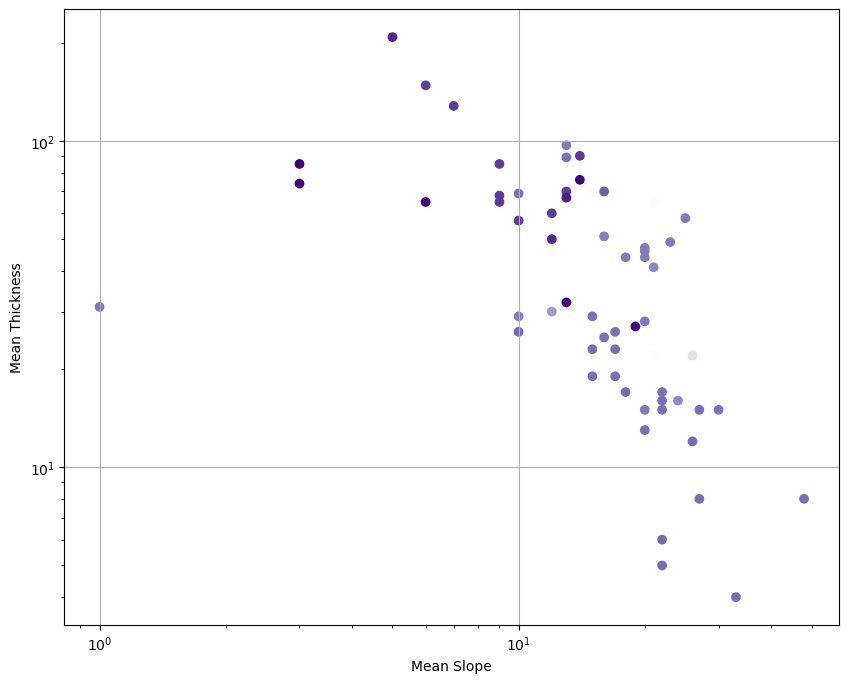

In [39]:
# Figure 1: Mean slope vs mean thickness
# solution
fig1=plt.figure(figsize=(10,8))
plt.scatter(data['mean_slope'], data['mean_thickness'], c=data['lat'], cmap='Purples')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Mean Slope')
plt.ylabel('Mean Thickness')
plt.grid(True)
plt.show()

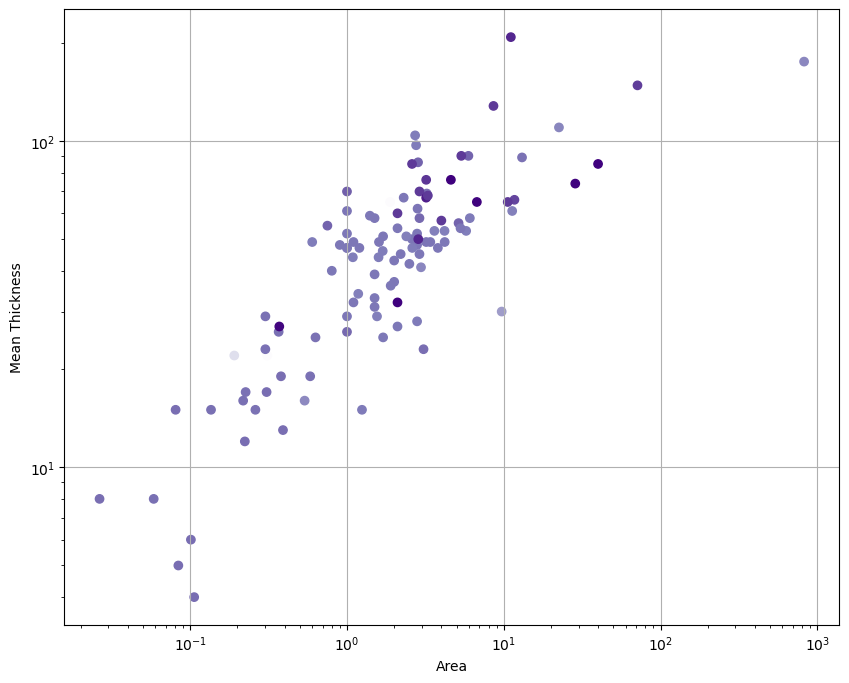

In [40]:
# Figure 2: area vs mean thickness
# solution

fig2=plt.figure(figsize=(10,8))
plt.scatter(data['area'], data['mean_thickness'], c=data['lat'], cmap='Purples')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Area')
plt.ylabel('Mean Thickness')
plt.grid(True)
plt.show()

### b) 3D Scatter plot using Plotly (1 point)

Use the plotly ``scatter_3d`` plot. Make sure to change the pandas series for log scales.

In [62]:
# solution
fig3 = px.scatter_3d(data, x='mean_slope', y='mean_thickness', z='area', height=800, width=800, log_x=True, log_y=True, log_z=True, color=data['lat'])
fig3.show()


### c) Pandas Correlation function (1 point)

You may use Pandas functionalities to explore correlation between data. Use the function ``corr`` on the dataframe and the matplotlib function ``matshow`` to plot a heatmap of the correlations

<Figure size 1000x800 with 0 Axes>

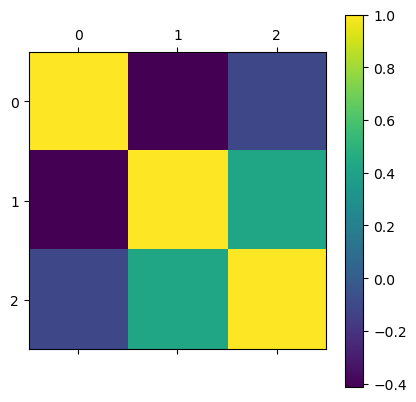

In [42]:
#solution
subData = data[['mean_slope','mean_thickness','area']]
correlation = subData.corr()

fig4 = plt.figure(figsize=(10,8))
plt.matshow(correlation)
plt.colorbar()
plt.show()


<Figure size 1000x800 with 0 Axes>

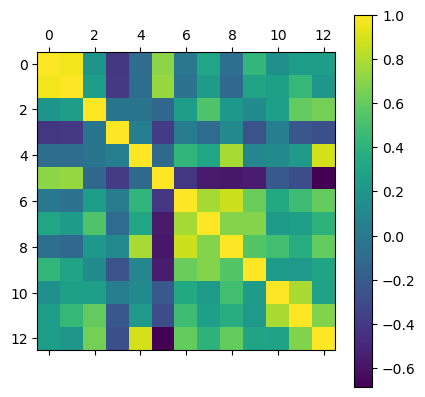

                                  id  survey_id       lat       lon      area  \
id                          1.000000   0.962398  0.182927 -0.413364 -0.081357   
survey_id                   0.962398   1.000000  0.254416 -0.405421 -0.087107   
lat                         0.182927   0.254416  1.000000 -0.028270 -0.030812   
lon                        -0.413364  -0.405421 -0.028270  1.000000  0.042181   
area                       -0.081357  -0.087107 -0.030812  0.042181  1.000000   
mean_slope                  0.706379   0.734588 -0.121839 -0.391860 -0.103678   
mean_thickness             -0.012693  -0.043060  0.260012  0.020427  0.423154   
mean_thickness_uncertainty  0.304644   0.236562  0.536359 -0.097841  0.306735   
max_thickness              -0.072180  -0.107183  0.215815  0.107837  0.780548   
max_thickness_uncertainty   0.428445   0.299702  0.128820 -0.252058  0.091813   
number_points               0.161769   0.270310  0.263966  0.034676  0.121837   
number_profiles             

In [43]:
correlation_total = data.corr()

fig5 = plt.figure(figsize=(10,8))
plt.matshow(correlation_total)
plt.colorbar()
plt.show()
print(correlation_total)

### f) Seaborn Plotting (1 point)

Seaborn is a great python package for basic data anlytics. See documentation [here](!https://seaborn.pydata.org/).

<AxesSubplot:>

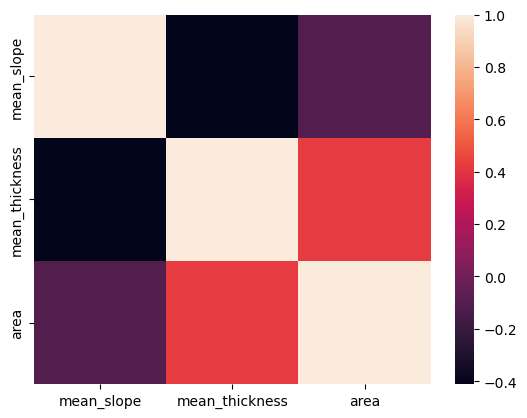

In [44]:
# solution
import seaborn as sns

sns.heatmap(correlation)

Discuss the basic correlations among the data. Do these correction make sense when you think about the shapes of glaciers?

enter text below



## 4. Linear Regression (10 points total counted in the next section)
You found from basic data visualization that the three parameters ``mean_slope``, ``mean_thickness``, and ``area`` are correlated. It does make physical sense because a *steep* glaciers is likely to be in the high mountains regions, hanging on the mountain walls, and thus be constrained, and conversely, a flat glacier is either at its valley, ocean terminus or on ice sheets.

### a) Simple linear regression (2 points)
We will now perform a regression between the parameters (or their log!). Linear regressions are models that can be imported from scikit-learn. Log/exp functions in numpy as ``np.log()`` and ``np.exp()``.
Remember that a linear regression is finding $a$ and $b$ knowing both $x$ and the data $y$ in $y = Ax +b$. We want to predict ice thickness from a crude estimate of the glacier area.

__Tips__: 
a. make sure that the dimensions are correct and that there is no NaNs and zeros.
b. Make sure to inport the scikit learn linear regression function and the error metrics.

In [75]:
# solution
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = np.asarray(np.log(data['area'])).reshape(-1, 1)
y = np.asarray((data['mean_thickness'])).reshape(-1, 1)
LR = LinearRegression().fit(x,y)
coefficient = LR.coef_
intercept = LR.intercept_

thickness_pred = LR.predict(x)

print('Mean squared error: %.2f' % mean_squared_error(y, thickness_pred))
print('Coefficient of determination: %.2f' % r2_score(y, thickness_pred))

Mean squared error: 425.52
Coefficient of determination: 0.59


Make a plot of the data and the linear regression your performed

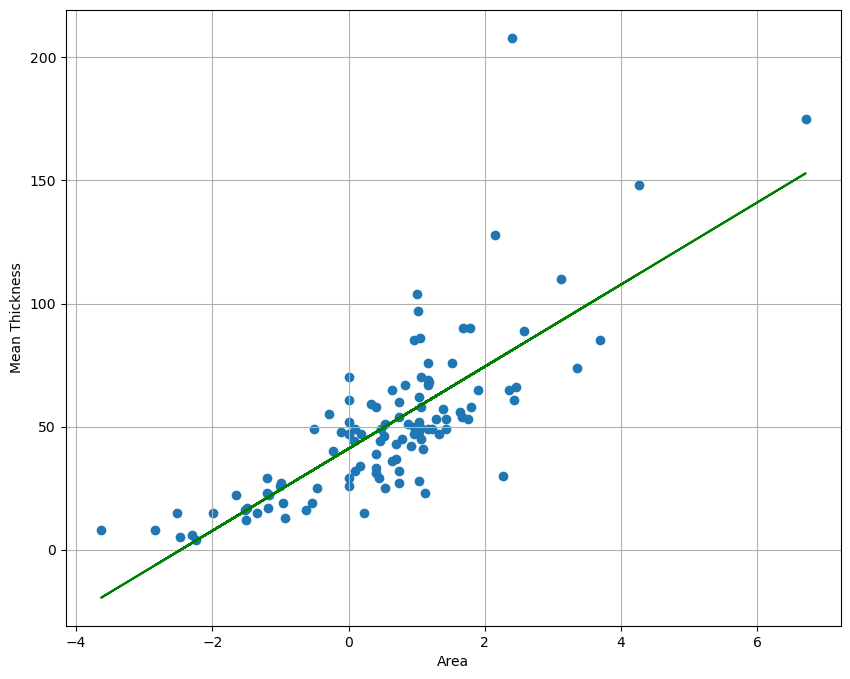

In [78]:
# solution
fig6 = plt.figure(figsize=(10,8))
plt.grid(True)
plt.scatter(x,y)
plt.plot(x,thickness_pred, color='green')
plt.xlabel('Area')
plt.ylabel('Mean Thickness')
plt.show()


**Briefly comment on the quality of your fit and a linear regression (1 point)**

The fit looks pretty good, except that there are outliers on the extreme low and high values of mean area.

### b) Leave One Out Cross Validation linear regression (1 point)


Perform the LOCCV on the ``area`` and ``thickness`` values. Predict the ``thickness`` value knowing a ``area`` value. Use material seen in class. Make a plot of your fit.

d:\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

d:\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

d:\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

d:\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

d:\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

d:\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

d:\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning:

R^2 score

mean of the regression coefficient 16.6643334.2 and the standard deviation 0.1588834.2
CV = 445.43
16.66433310272453
41.028834620157156


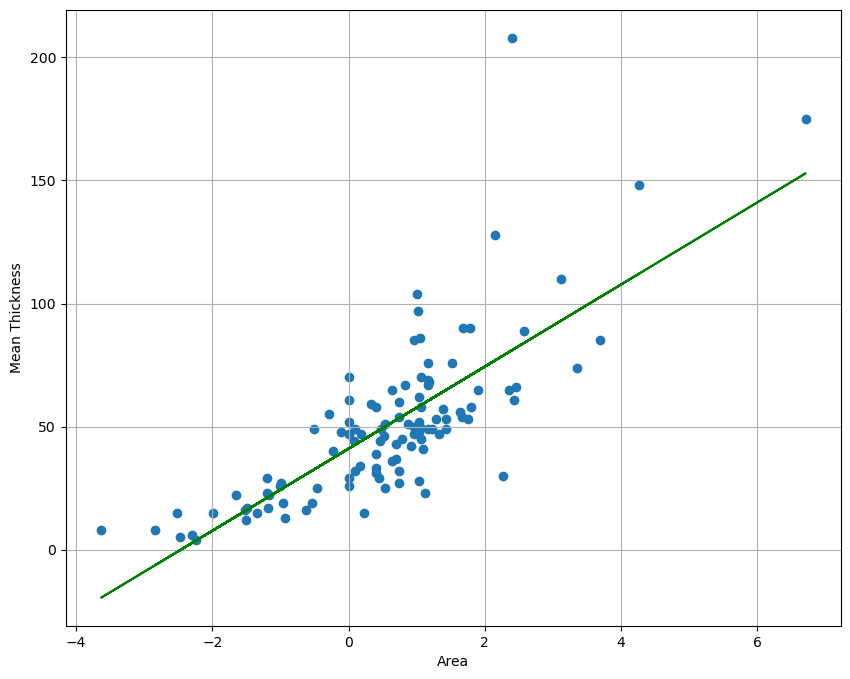

In [76]:
from sklearn.model_selection import LeaveOneOut
# solution
loo = LeaveOneOut()
area_array = np.asarray(np.log(data['area'])).reshape(-1, 1)
thickness_array = np.asarray((data['mean_thickness'])).reshape(-1, 1)

vel = np.zeros(len(thickness_array)) # initalize a vector to store the regression values
mse_train = np.zeros(len(thickness_array))
mse_val = np.zeros(len(thickness_array))
r2s = np.zeros(len(thickness_array))
intercepts = np.zeros(len(thickness_array))
i=0
for train_index, test_index in loo.split(thickness_array):    
    thickness_train, thickness_val = thickness_array[train_index], thickness_array[test_index]
    area_train, area_val = area_array[train_index], area_array[test_index]
    # now fit the data on the training set.
    regr = LinearRegression()
    # Fit on training data:
    regr.fit(area_train, thickness_train)
    # We will first predict the fit:
    thickness_pred_train=regr.predict(area_train) 
    thickness_pred_val=regr.predict(area_val) 

    # The coefficients
    vel[i]= regr.coef_[0][0]
    mse_train[i]= mean_squared_error(thickness_train, thickness_pred_train)
    mse_val[i]= mean_squared_error(thickness_val, thickness_pred_val)
    r2s[i]=r2_score(thickness_val, thickness_pred_val)
    intercepts[i] = regr.intercept_
    i+=1

print("mean of the regression coefficient %f4.2 and the standard deviation %f4.2"%(np.mean(vel),np.std(vel)))
print("CV = %4.2f"%(np.mean(mse_val)))

LOCCV_coef = np.mean(vel)
LOCCV_intercept = np.mean(intercepts)

print(LOCCV_coef)
print(LOCCV_intercept)
LOCCV_pred = LOCCV_coef * area_array + LOCCV_intercept


# make a plot

fig6 = plt.figure(figsize=(10,8))
plt.grid(True)
plt.scatter(area_array,thickness_array)
plt.plot(area_array,LOCCV_pred, color='green')
plt.xlabel('Area')
plt.ylabel('Mean Thickness')
plt.show()



### c) Bootstrapping (1 point)

Perform the same analysis but using a bootstrapping technique. Output the mean and standard deviation of the slope. An illustration with a histogram  may help.

mean of the coefficient 16.7881044.2 and the standard deviation 1.6198424.2


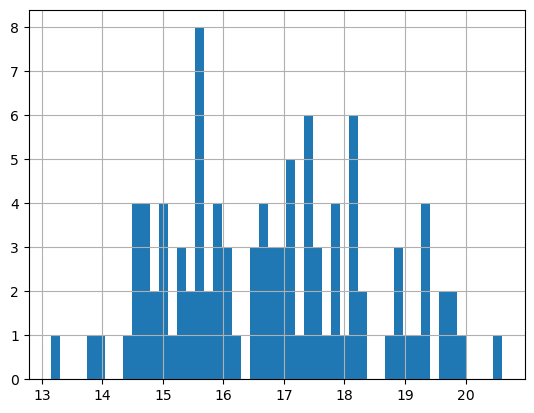

In [77]:
from sklearn.utils import resample
# solution

k=100

vel = np.zeros(k) # initalize a vector to store the regression values
mse = np.zeros(k)
r2s = np.zeros(k)
i=0
for iik in range(k):    
    ii = resample(np.arange(len(thickness_array)),replace=True,n_samples=len(thickness_array))# new indices
    thickness_b, area_b = thickness_array[ii], area_array[ii]
    # now fit the data on the training set.
    regr = LinearRegression()
    # Fit on training data:
    regr.fit(area_b, thickness_b)
    thickness_pred_val=regr.predict(area_array) # test on the validation set.

    # The coefficients
    vel[i]= regr.coef_[0][0]
    i+=1

# the data shows cleary a trend, so the predictions of the trends are close to each other:
print("mean of the coefficient %f4.2 and the standard deviation %f4.2"%(np.mean(vel),np.std(vel)))

plt.hist(vel,50);plt.grid(True)
plt.show()


### d) Predict the thickness of a glacier (2 points)

Let assume that you measure a glacier of area 10 km$^2$. Can you use your bootstrap regression framework to provide a distribution of possible values of the ice thickness ? Output the mean and standard deviation of the predicted ice thickness.

79.60413041483841
mean of the thickness 79.6041304.2 meters for a glacier of 10 km^2 and the standard deviation 4.3997864.2 meters


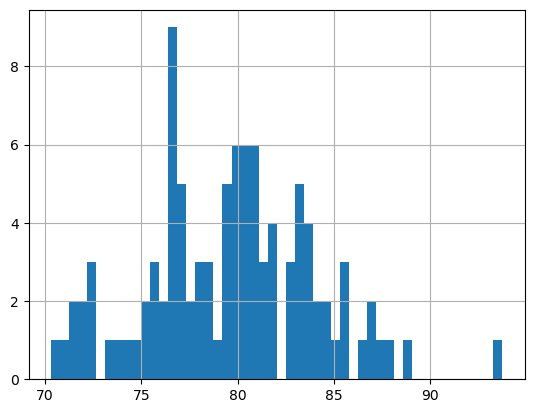

In [85]:
# solution
k=100

vel = np.zeros(k)
area_observation = np.asarray(np.log(10)).reshape(-1,1)
i = 0

for iik in range(k):    
    ii = resample(np.arange(len(thickness_array)),replace=True,n_samples=len(thickness_array))# new indices
    thickness_b, area_b = thickness_array[ii], area_array[ii]
    # now fit the data on the training set.
    regr = LinearRegression()
    # Fit on training data:
    regr.fit(area_b,thickness_b)
    vel[i]=regr.predict(area_observation)     
    i+=1

print(np.mean(vel))


print("mean of the thickness %f4.2 meters for a glacier of 10 km^2 and the standard deviation %f4.2 meters"%(np.mean(vel),np.std(vel)))
plt.hist(vel,50);plt.grid(True)
plt.show()
